<a href="https://colab.research.google.com/github/shiladityasarkar/QuantumComputing/blob/master/2348556_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
%pip install qiskit -q
%pip install pylatexenc -q
%pip install -U qiskit-aer -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 47.6 MB/s eta 0:00:00


In [17]:
from qiskit import *
from qiskit.visualization import *
from qiskit.primitives import *
from qiskit_aer import Aer
import warnings
warnings.filterwarnings('ignore')

In [3]:
circuit = QuantumCircuit(1)
circuit.h(0)
circuit.s(0)
circuit.h(0)
circuit.t(0)
circuit.draw()

┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ S ├┤ H ├┤ T ├
   └───┘└───┘└───┘└───┘

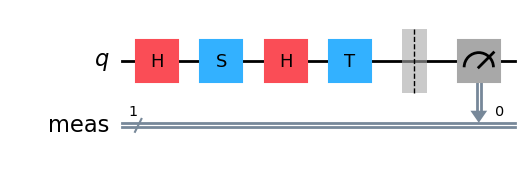

In [4]:
circuit.measure_all()
circuit.draw(output='mpl')

In [5]:
X = QuantumRegister(1, 'X')
circuit = QuantumCircuit(X)
circuit.h(X)
circuit.s(X)
circuit.h(X)
circuit.t(X)
circuit.draw()

┌───┐┌───┐┌───┐┌───┐
X: ┤ H ├┤ S ├┤ H ├┤ T ├
   └───┘└───┘└───┘└───┘

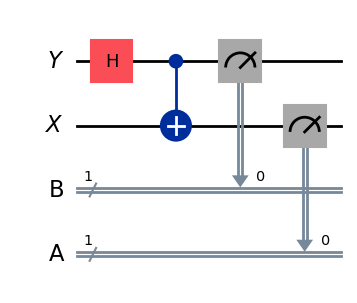

In [6]:
X = QuantumRegister(1, 'X')
Y = QuantumRegister(1, 'Y')
A = ClassicalRegister(1, 'A')
B = ClassicalRegister(1, 'B')
circuit = QuantumCircuit(Y, X, B, A)
circuit.h(Y)
circuit.cx(Y, X)
circuit.measure(Y, B)
circuit.measure(X, A)
circuit.draw(output='mpl')

<ipython-input-7-1207c52e94a1>:1: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  results = Sampler().run(circuit).result()


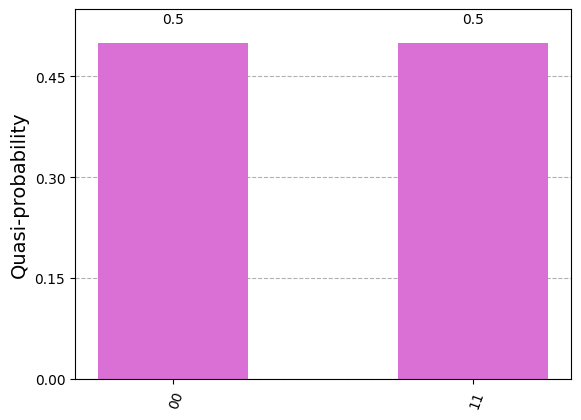

In [7]:
results = Sampler().run(circuit).result()
statistics = results.quasi_dists[0].binary_probabilities()
plot_histogram(statistics, color='orchid')

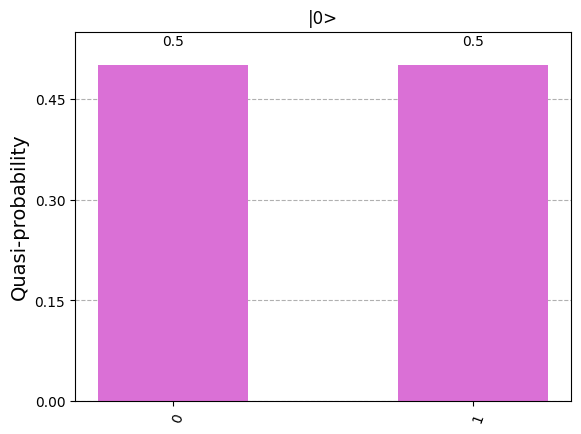

In [21]:
circuit_0 = QuantumCircuit(1, 1)
circuit_0.h(0)
circuit_0.s(0)
circuit_0.h(0)
circuit_0.t(0)
circuit_0.measure(0,0)

circuit_1 = QuantumCircuit(1,1)
circuit_1.x(0)
circuit_1.h(0)
circuit_1.s(0)
circuit_1.h(0)
circuit_1.t(0)
circuit_1.measure(0,0)

job_0 = Sampler().run(circuit_0).result()
job_1 = Sampler().run(circuit_1).result()

statistics = job_0.quasi_dists[0].binary_probabilities()
plot_histogram(statistics, color='orchid', title='|0>')

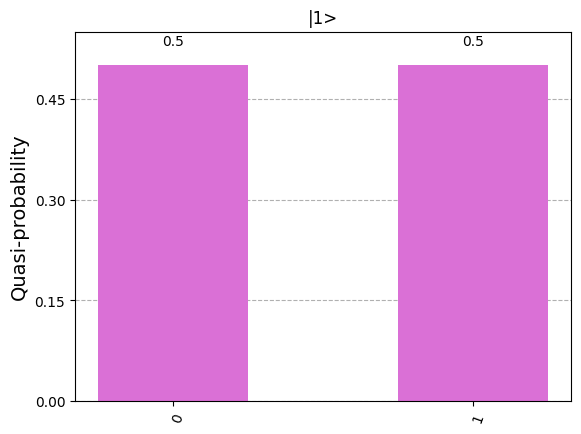

In [20]:
statistics = job_1.quasi_dists[0].binary_probabilities()
plot_histogram(statistics, color='orchid', title='|1>')

In [22]:
# prompt: Check the reversibility of the operation HSHT.

from qiskit import *
from qiskit.visualization import *
from qiskit.primitives import *
from qiskit_aer import Aer

# Define the HSHT circuit
circuit = QuantumCircuit(1,1)
circuit.h(0)
circuit.s(0)
circuit.h(0)
circuit.t(0)
circuit.measure(0,0)

# Simulate the circuit
job = Sampler().run(circuit).result()
statistics = job.quasi_dists[0].binary_probabilities()
plot_histogram(statistics, color='orchid', title='HSHT')


# Define the inverse HSHT circuit
inverse_circuit = QuantumCircuit(1,1)
inverse_circuit.tdg(0) # Inverse of T
inverse_circuit.h(0)
inverse_circuit.sdg(0) # Inverse of S
inverse_circuit.h(0)

# Combine the original circuit and the inverse circuit
combined_circuit = circuit.compose(inverse_circuit)
combined_circuit.measure_all()


# Simulate the combined circuit to verify reversibility
job = Sampler().run(combined_circuit).result()
statistics_combined = job.quasi_dists[0].binary_probabilities()
plot_histogram(statistics_combined, color='green', title='HSHT followed by inverse HSHT')

QiskitError: 'Some classical bits are not used for measurements. the number of classical bits (2), the used classical bits ({1}).'